In [10]:
import numpy as np
from scipy.spatial import Delaunay
import math
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, Voronoi, voronoi_plot_2d
import random

In [11]:
def random_2d_unit_vector():
    angle = random.vonmisesvariate(0, 0)
    v = np.array([math.cos(angle),math.sin(angle)])
    return v

# returns grid of points sampled from a poisson disk distribution
def poisson_sample(r, n, k, dr):
    
    rmin = r
    
    # initiallize grid
    w = float(r) / math.sqrt(n) # cell size
    num_cols = math.ceil(cwidth / w)
    num_rows = math.ceil(cheight / w)
    grid = [-1] * num_cols * num_rows 
    active = []
    
    # select initial sample & inset into grid & active list
    #x, y = cwidth*random.random(), cheight*random.random()
    x, y = cwidth/2, cheight/2
    p = np.array([x,y])
    row, col = math.floor(x/w), math.floor(y/w)
    active.append(p)
    
    # sample new points
    while len(active) > 0:
        rmin = rmin*dr
        active_p = random.choice(active)
        found_new_point = False
        
        for iter in range(k):
            # sample point
            sample = random_2d_unit_vector()
            magnitude = (1+random.random())*rmin
            #sample.setMag(magnitude)
            sample = magnitude * sample
            sample = sample + active_p
            if not (sample[0] > cwidth or sample[0] < 0 or
                    sample[1] > cheight or sample[1] < 0):
                sample_col = math.floor(sample[0] / w)
                sample_row = math.floor(sample[1] / w)
                
                #check for colloisions with neighbors
                collision = False
                for i in range(max(sample_col-1, 0), min(sample_col+2, num_cols)):
                    for j in range(max(sample_row-1, 0), min(sample_row+2, num_rows)):
                        neighbor = grid[i + j * num_cols]
                        if type(neighbor) == np.ndarray:
                            d = np.linalg.norm(sample - neighbor)
                            if d < rmin:
                                collision = True
                                
                # if no collision, add new point
                if not collision:
                    found_new_point = True
                    grid[sample_col + sample_row * num_cols] = sample
                    active.append(sample)
                    break
        
        # if no new samples are possible, remove point from active list
        if not found_new_point:
            idx = np.where(active == active_p)[0][0]
            del active[idx]
    
    final_points = np.array([ list(p) for p in grid if type(p) == np.ndarray ])
    return final_points

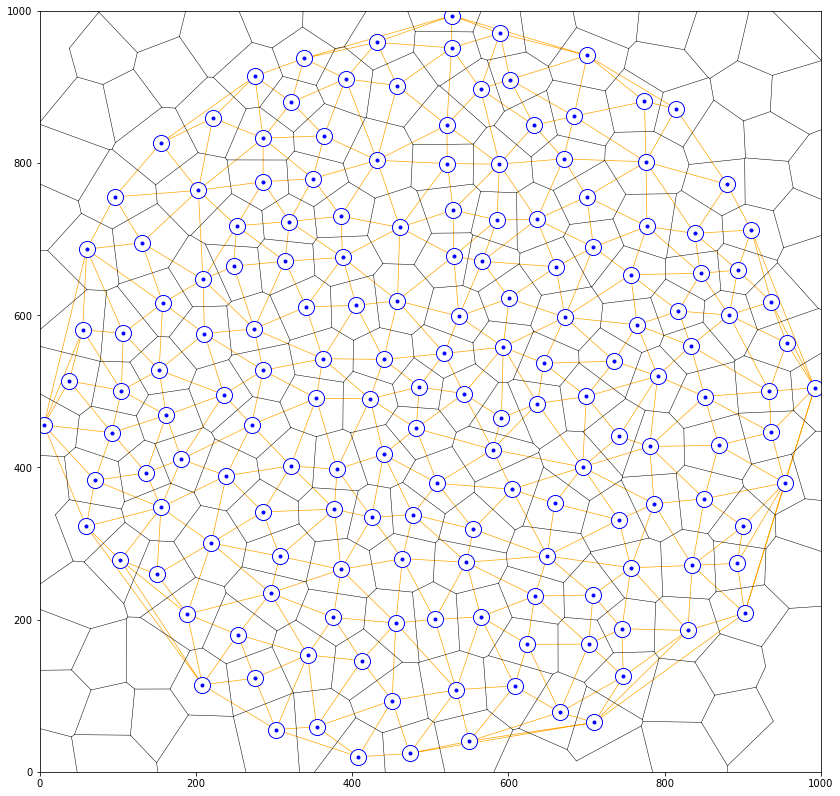

In [51]:
# CANVAS PARAMS
cwidth = 1000
cheight = 1000

# POISSON SAMPLING PARAMS
r = 50 # min distance between points in pixels
n = 2 # number of dimensions
k = 50 # limit of samples to choose before rejection
dr = 1.001 # r multiplier

plt.figure(figsize=(14,14))
points = poisson_sample(r, n, k, dr)

# circularize the points
radius = min(cwidth/2, cheight/2)
midpoint = np.array([cwidth/2, cheight/2])
encircled_points = points[np.where(np.linalg.norm(points - midpoint, axis=1) <= radius)]


plt.plot(encircled_points[:,0], encircled_points[:,1], 'bo', markersize=16)
plt.plot(encircled_points[:,0], encircled_points[:,1], 'wo', markersize=14)

# Voronoi Diagram
vor = Voronoi(points)
for [idx1, idx2] in vor.ridge_vertices:
    if idx1 >=0 and idx2 >= 0:
        p1 = vor.vertices[idx1]
        p2 = vor.vertices[idx2]
        plt.plot([p1[0],p2[0]], [p1[1],p2[1]], color='black', linewidth=0.5)
        
# Delaunay Triangulation
tri = Delaunay(encircled_points)
plt.triplot(encircled_points[:,0], encircled_points[:,1], tri.simplices, c='orange', linewidth=.7)
plt.plot(encircled_points[:,0], encircled_points[:,1], 'bo', markersize=3)

    

plt.xlim([0,1000])
plt.ylim([0,1000])
plt.show()

In [33]:
encircled_points[:,0]

array([337.49851851, 410.57669563, 520.47319156, 612.20368375,
       224.63538259, 528.25683355, 753.18907906, 129.83579151,
       386.74850481, 643.06936308, 893.58394473,  58.80222885,
       186.29893461, 284.35770554, 372.4793957 , 485.38566703,
       572.21010195, 780.39993326, 227.32533702, 607.54043696,
       716.67624457, 848.73485795, 973.55468366, 133.8434922 ,
       299.81393127, 405.91105469, 510.55073075, 772.63862251,
        18.56991213, 646.46646024, 979.10026082,  33.2535212 ,
       168.6176403 , 313.75054224, 414.30931605, 528.70730219,
       761.06715604, 883.992216  , 284.39011362, 455.81663007,
       666.23984364, 960.75052348, 150.69802107, 547.78919626,
       655.98906201, 843.00279596, 278.93321171, 426.42151381,
       622.48988055, 752.47108567, 220.38077307, 339.1183025 ,
       503.79638791, 435.77216358, 609.34790637, 724.04993602])